Pankajan T.
190428D

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


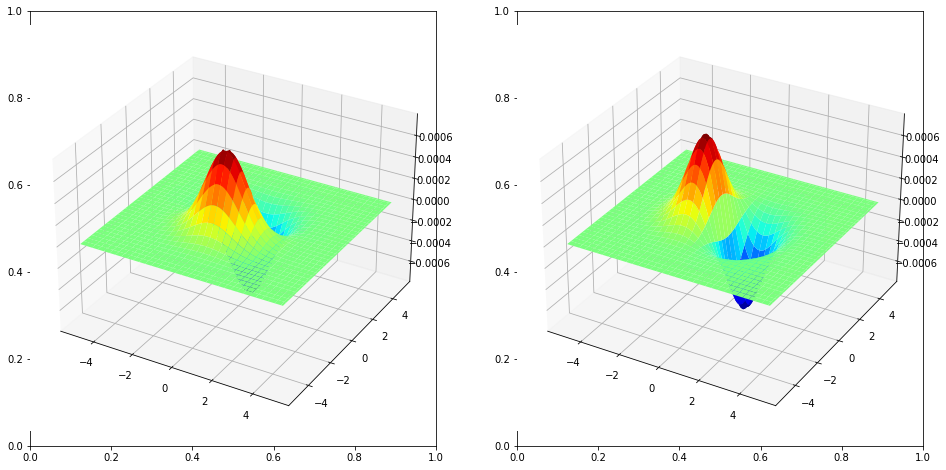

In [43]:
#Que1


fig, ax = plt.subplots (1,2, figsize=(16,8))
ax1 = fig.add_subplot (121, projection='3d')
ax2= fig.add_subplot (122, projection='3d')
delta = 0.1
xx, YY = np.meshgrid(np.arange(-5, 5 + delta, delta),np.arange(-5, 5 + delta, delta))
sigma = 1

g= np.exp(-(xx**2 + YY**2)/(2*sigma**2)) 
g /= np.sum(g)
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
g_x= cv.filter2D(g, -1, sobel_v) 
sobel_h= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32) 
g_y = cv.filter2D(g, -1, sobel_h)
surfı = ax1.plot_surface(xx, YY, g_x, cmap=cm.jet, linewidth=0, antialiased=True) 
# ax1.set_xlim(-15,15)
# ax1.set_ylim(-15,15)
surf2 = ax2.plot_surface(xx, YY, g_y, cmap=cm.jet, linewidth=0, antialiased=True)   
# ax2.set_xlim(-15,15)
# ax2.set_ylim(-15,15)            
# ax1.axis('off')
# ax2.axis('off')
plt.show()

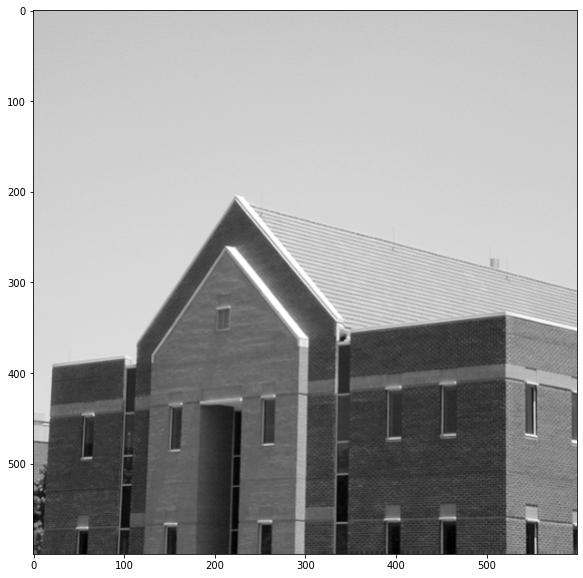

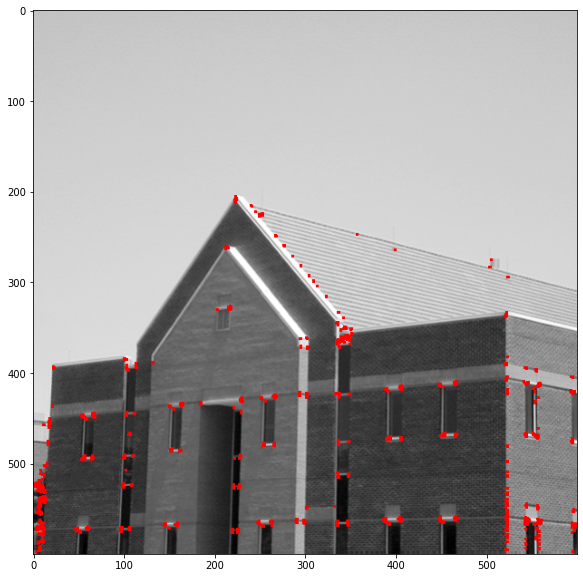

In [34]:
#Que 2

img = cv.imread("building.tif")
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

plt.show()

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

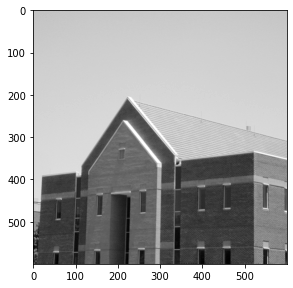

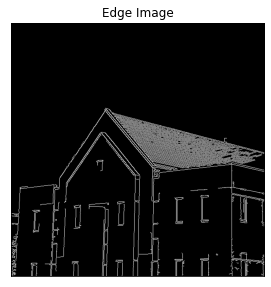

In [31]:
#Que 4

img = cv.imread('building.tif',0)
edges = cv.Canny(img,100,200)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.figure(figsize=(10,10))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')


plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

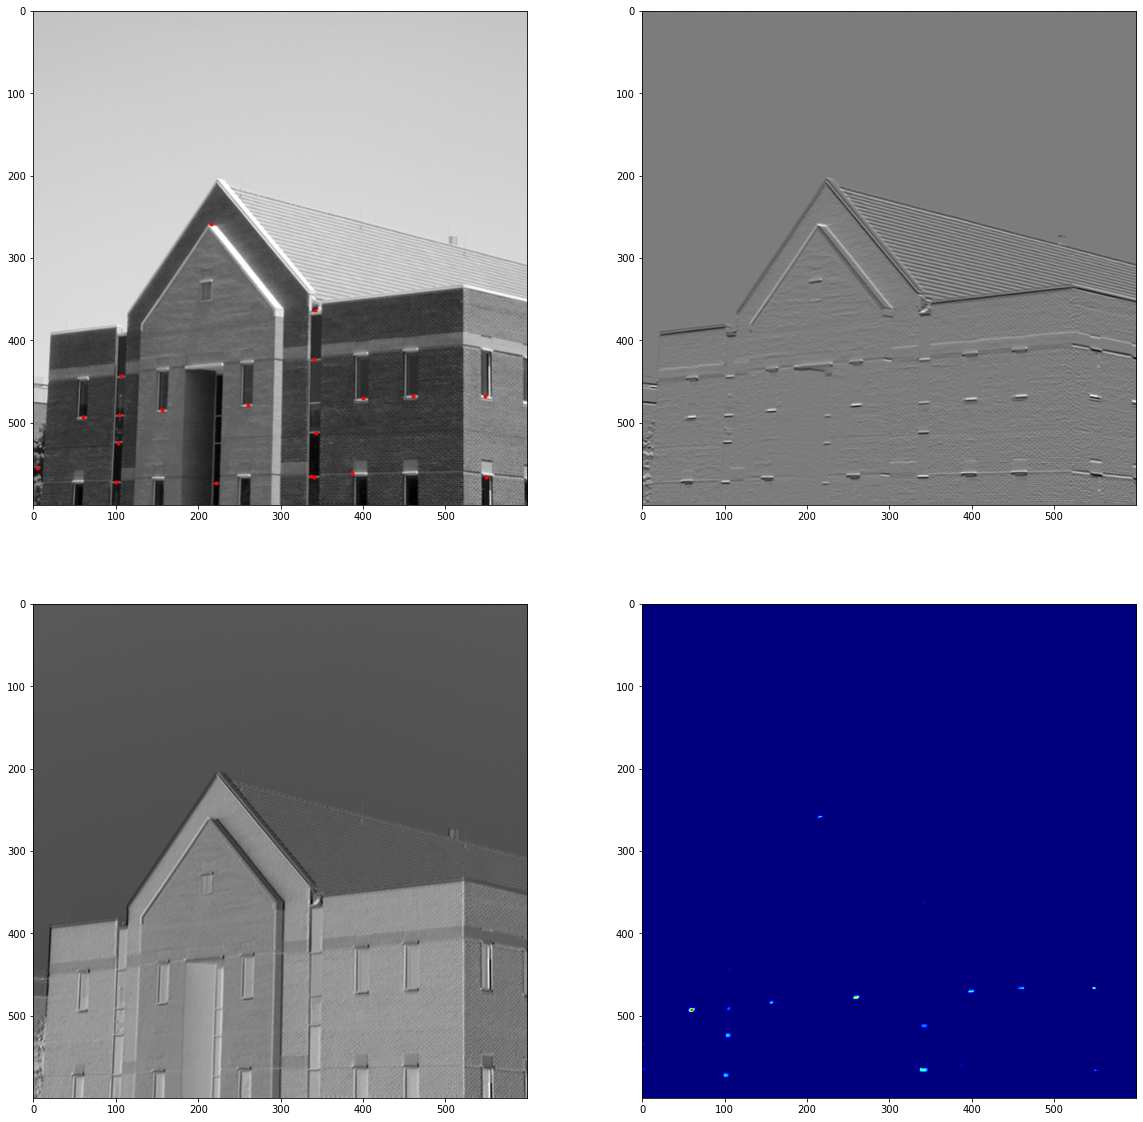

In [38]:
#Que 3

from skimage.feature import peak_local_max

im =cv.imread('building.tif',cv.IMREAD_COLOR)

I = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
I = np.float32(I)
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h = np.array([[-1,0,-1],[-2,0,2],[-1,0,1]],dtype=np.float32)

Ix = cv.filter2D(I, -1 ,sobel_v)
Iy = cv.filter2D(I, -1 ,sobel_h)

sigma =3
ksize =7

m11 = cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12 = cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)

m21 = m12

m22 = cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)

det = m11*m22 -m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace**2

R[R<1e8]=0
coordinates = peak_local_max(R,min_distance =2)

fig ,ax =plt.subplots(2,2,figsize=(20,20))
ax[0,0].imshow(im,cmap='gray')
ax[0,0].plot(coordinates[:,1],coordinates[:,0],'r.')
ax[0,1].imshow(Ix+127,cmap='gray')
ax[1,0].imshow(Iy+127,cmap = 'gray')
ax[1,1].imshow(R+127,cmap=cm.jet)



